In [3]:
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

import pickle


In [27]:
with open('./pickle_objects/experiments/df_all_experiments.pickle', 'rb') as f:
    d = pickle.load(f)


In [29]:
d.to_csv("a.csv", index=False)

In [56]:
with open('./pickle_objects/experiments/df_experiment_webkb_k100.pickle', 'rb') as f:
    x = pickle.load(f)

x

,database_name,hidden_channels,num_layers,p_dropout,loss,f1,acc,epochs,elapsed_time
0,webkb K=100,100,2,0.0,0.020852,0.999094,0.999094,1000,1307.812
1,webkb K=100,100,3,0.0,0.348658,0.459393,0.545125,501,1110.429
2,webkb K=100,100,4,0.0,0.671816,0.273586,0.378509,501,1571.757
3,webkb K=100,50,2,0.0,0.297695,0.510134,0.600966,501,441.811
4,webkb K=100,50,3,0.0,0.659737,0.341387,0.404769,501,660.808
5,webkb K=100,50,4,0.0,0.715570,0.352489,0.410202,501,857.428
6,webkb K=100,10,2,0.0,1.104834,0.094131,0.207063,501,341.316
7,webkb K=100,10,3,0.0,1.061231,0.130588,0.264111,501,408.238
8,webkb K=100,10,4,0.0,1.006842,0.176995,0.300030,501,475.678


In [47]:
with open('./pickle_objects/experiments/df_experiment_webkb_k100.pickle', 'rb') as f:
    d = pickle.load(f)

d

,database_name,hidden_channels,num_layers,p_dropout,loss,f1,acc,epochs,elapsed_time
0,webkb K=100,100,2,0.0,0.020852,0.999094,0.999094,1000,1307.812
1,webkb K=100,100,3,0.0,0.348658,0.459393,0.545125,501,1110.429
2,webkb K=100,100,4,0.0,0.671816,0.273586,0.378509,501,1571.757
3,webkb K=100,50,2,0.0,0.297695,0.510134,0.600966,501,441.811
4,webkb K=100,50,3,0.0,0.659737,0.341387,0.404769,501,660.808
5,webkb K=100,50,4,0.0,0.715570,0.352489,0.410202,501,857.428
6,webkb K=100,10,2,0.0,1.104834,0.094131,0.207063,501,341.316
7,webkb K=100,10,3,0.0,1.061231,0.130588,0.264111,501,408.238
8,webkb K=100,10,4,0.0,1.006842,0.176995,0.300030,501,475.678


In [30]:
seed_everything(seed=42)
logger.info("Loading preprocessed results dataframes")

with open('./pickle_objects/experiments/df_all_experiments.pickle', 'rb') as f:
    df_all_experiments = pickle.load(f)
    
df_all_experiments = df_all_experiments.rename(columns={"database_name": "database", "K": "K_z", "hidden_channels": "num. hidden channels"})



[INFO][2023-03-27 18:02:23 - Mod: 1125990800 - Func: <module> - Line: 2]: Loading preprocessed results dataframes


In [58]:
df_all_experiments[(df_all_experiments.K_z=="10") &
                  # (df_all_experiments.p_dropout==0.2)&
                  # (df_all_experiments.database=='20ng') &
                   (df_all_experiments.num_layers==2)
                  ]

,database,num. hidden channels,num_layers,p_dropout,loss,f1,acc,epochs,elapsed_time,K_z
81,agnews,100,2,0.0,0.002492,1.000000,1.000000,222,1158.681,10
84,agnews,50,2,0.0,0.002154,1.000000,1.000000,266,710.902,10
87,agnews,10,2,0.0,0.002210,1.000000,1.000000,722,490.389,10
90,20ng,100,2,0,0.044999,0.005400,0.007458,201,49.753,10
93,20ng,50,2,0,0.074865,0.026582,0.040734,201,26.964,10
96,20ng,10,2,0,1.347682,0.212277,0.321859,201,14.315,10
99,webkb,100,2,0.0,0.003633,0.000000,0.000000,501,576.242,10
102,webkb,50,2,0.0,0.003597,0.000000,0.000000,501,260.204,10
105,webkb,10,2,0.0,0.313754,0.000000,0.000000,501,114.162,10
126,classic4,100,2,0,4.392876,0.210240,0.221283,7,69.465,10


/Users/brunofbessa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


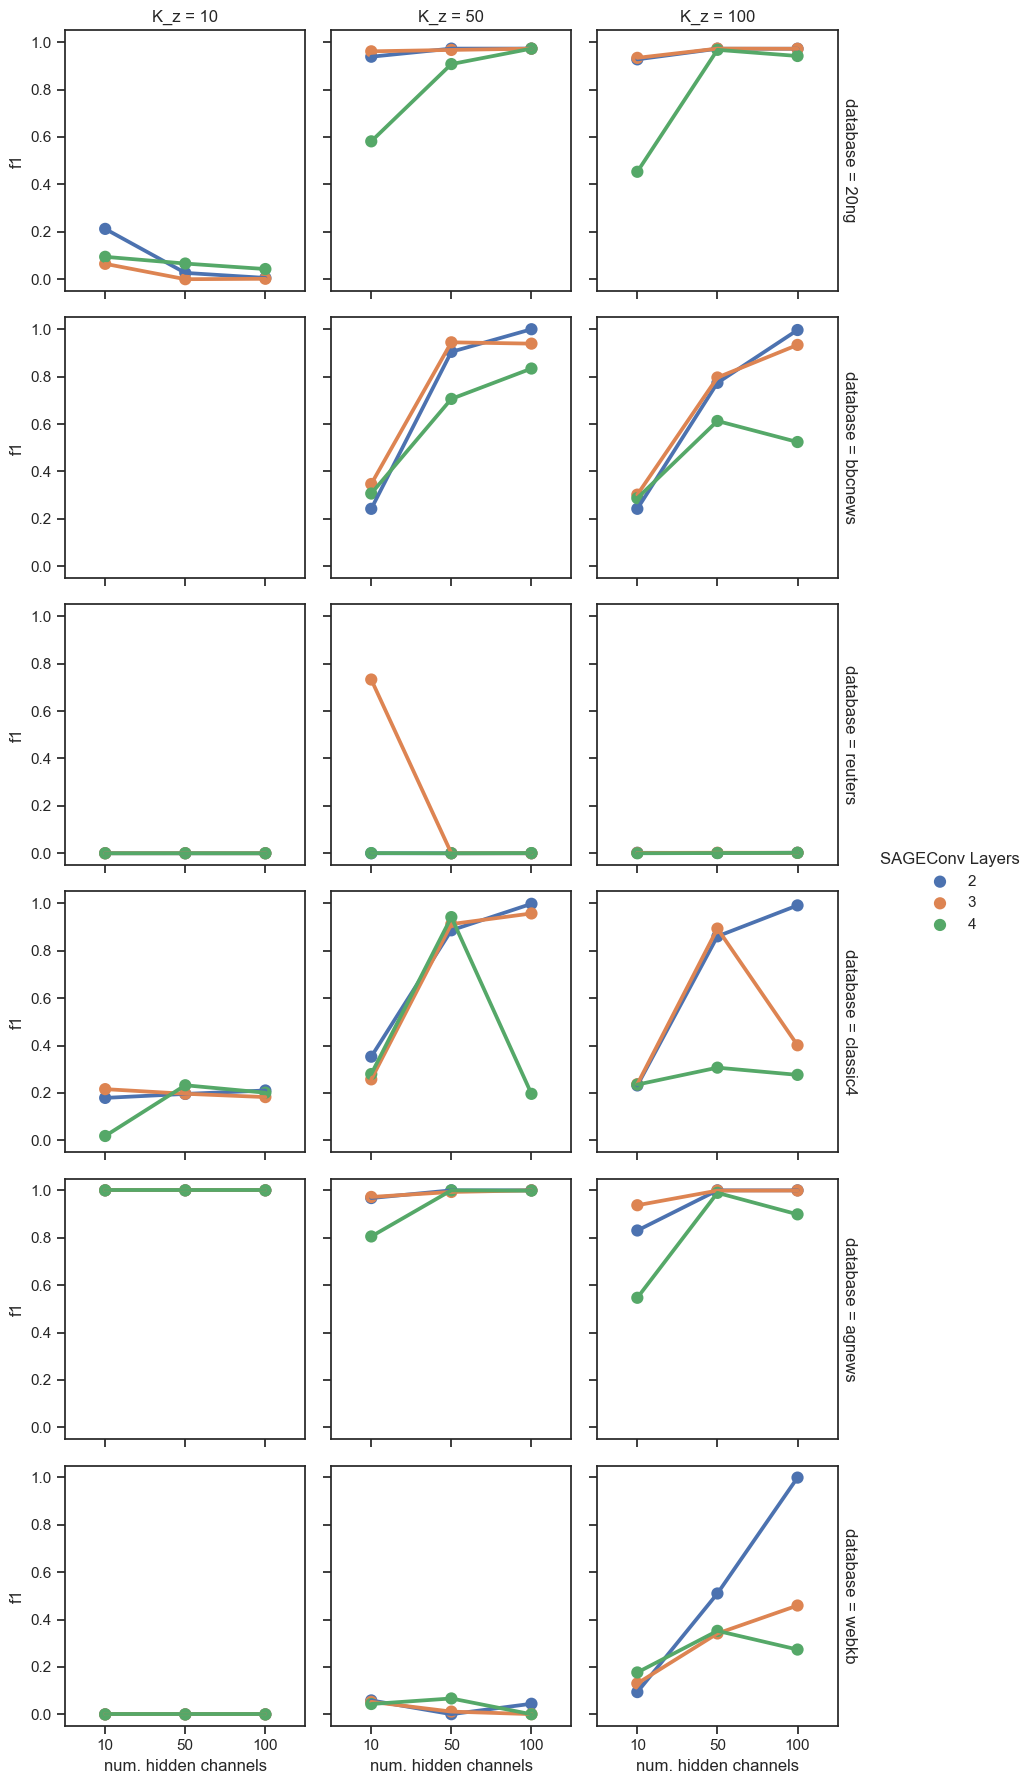

In [57]:
with open('./pickle_objects/experiments/df_all_experiments.pickle', 'rb') as f:
    df_all_experiments = pickle.load(f)
    
df_all_experiments = df_all_experiments.rename(columns={"database_name": "database", "K": "K_z", "hidden_channels": "num. hidden channels"})

g = sns.FacetGrid(df_all_experiments[(df_all_experiments.p_dropout==0.0)], 
                  col="K_z", 
                  col_order=['10', '50', '100'],
                  row="database",
                  row_order=['20ng', 'bbcnews', 'reuters', 'classic4', 'agnews', 'webkb'],
                  hue="num_layers", 
                  margin_titles=True, 
                  despine=False)
g = (g.map(sns.pointplot, "num. hidden channels", "f1").add_legend(title="SAGEConv Layers"))
#g.savefig("./plots/experiments_3_datasets.png")

/Users/brunofbessa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


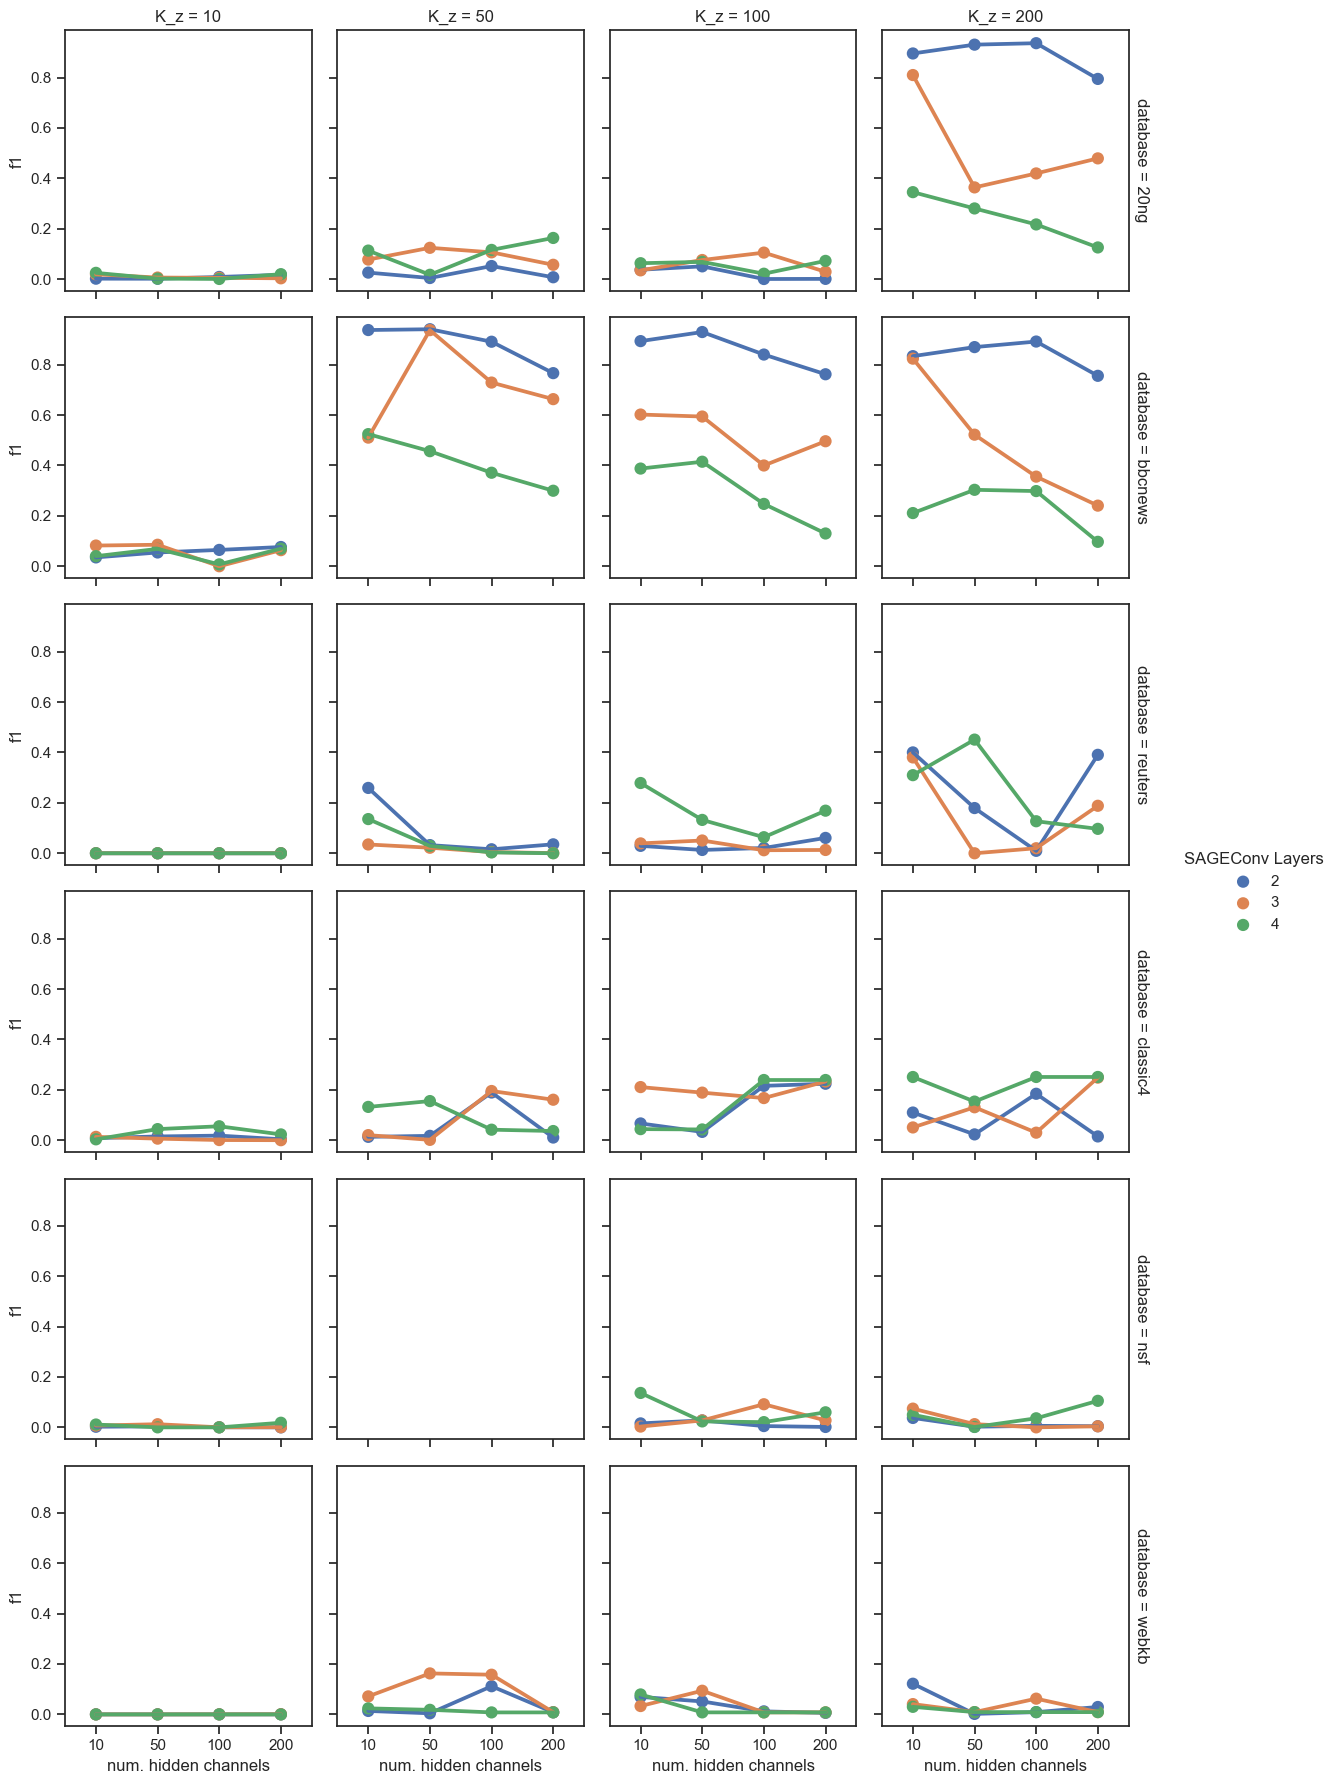

In [69]:
g = sns.FacetGrid(df_all_experiments[(df_all_experiments.p_dropout==0.15)], 
                  col="K_z", 
                  col_order=['10', '50', '100', '200'],
                  row="database",
                  row_order=['20ng', 'bbcnews', 'reuters', 'classic4', 'nsf', 'webkb'], 
                  hue="num_layers", 
                  margin_titles=True, 
                  despine=False)
g = (g.map(sns.pointplot, "num. hidden channels", "f1").add_legend(title="SAGEConv Layers"))
#g.savefig("./plots/experiments_3_datasets.png")

/Users/brunofbessa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


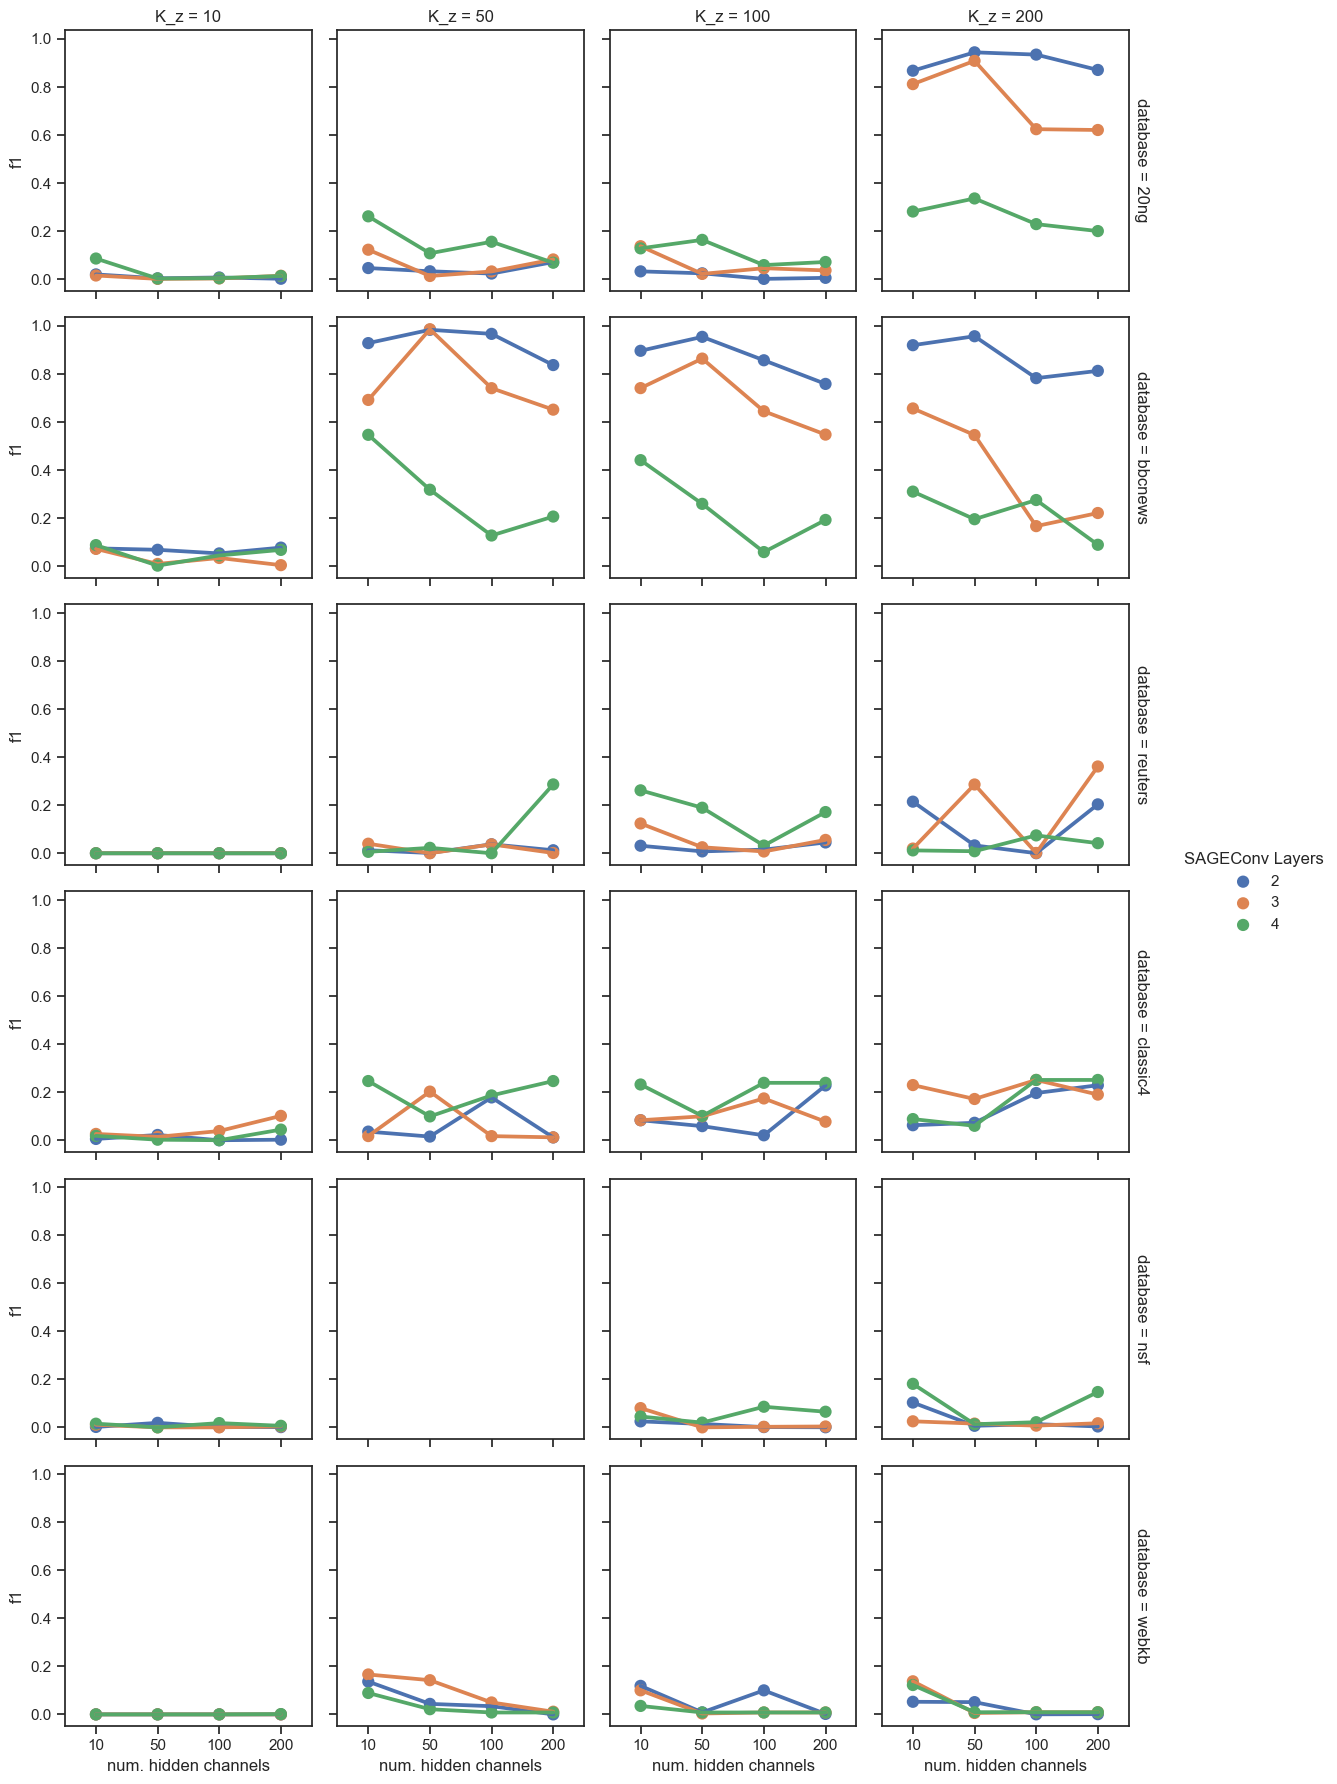

In [70]:
g = sns.FacetGrid(df_all_experiments[(df_all_experiments.p_dropout==0.2)], 
                  col="K_z", 
                  col_order=['10', '50', '100', '200'],
                  row="database",
                  row_order=['20ng', 'bbcnews', 'reuters', 'classic4', 'nsf', 'webkb'], 
                  hue="num_layers", 
                  margin_titles=True, 
                  despine=False)
g = (g.map(sns.pointplot, "num. hidden channels", "f1").add_legend(title="SAGEConv Layers"))
#g.savefig("./plots/experiments_3_datasets.png")

In [55]:
with open('./pickle_objects/experiments/df_experiment_reuters_k200.pickle', 'rb') as f:
    df = pickle.load(f)
    
df

,database_name,hidden_channels,num_layers,p_dropout,loss,f1,acc,epochs,elapsed_time
0,reuters K=200,10,2,0.10,0.176546,0.028020,0.031997,300,927.706
1,reuters K=200,10,2,0.15,0.306329,0.400181,0.373170,300,927.209
2,reuters K=200,10,2,0.20,0.367884,0.214849,0.147864,300,928.032
3,reuters K=200,10,3,0.10,0.918347,0.162401,0.118384,300,1042.568
4,reuters K=200,10,3,0.15,0.392247,0.380297,0.340046,292,1024.196
5,reuters K=200,10,3,0.20,0.612996,0.019578,0.014442,300,1052.343
6,reuters K=200,10,4,0.10,1.020283,0.191340,0.141703,300,1166.522
7,reuters K=200,10,4,0.15,1.013137,0.309925,0.229612,300,1177.274
8,reuters K=200,10,4,0.20,1.050242,0.011987,0.027095,300,1186.595
9,reuters K=200,50,2,0.10,0.105311,0.157845,0.103213,149,594.565


[INFO][2023-03-09 23:59:53 - Mod: 728354027 - Func: <module> - Line: 2]: Loading preprocessed results dataframes
/Users/brunofbessa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


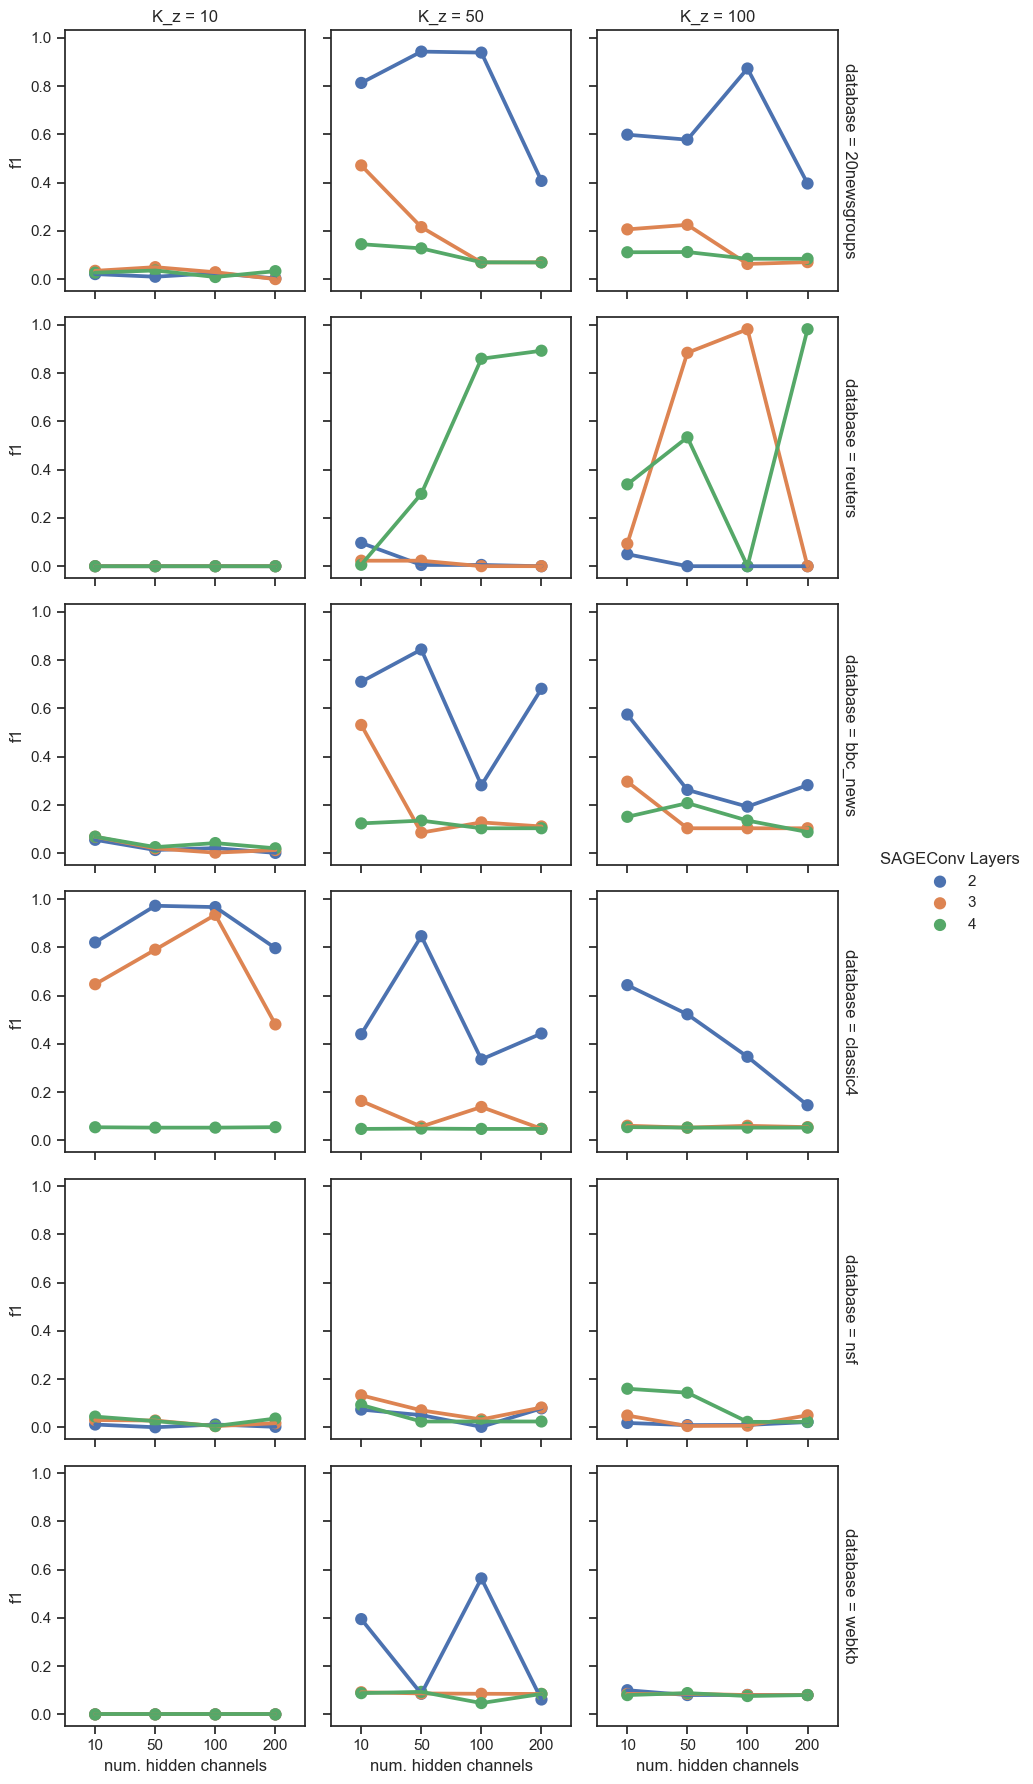

In [3]:
seed_everything(seed=42)
logger.info("Loading preprocessed results dataframes")

with open('./pickle_objects/df_all_experiments.pickle', 'rb') as f:
    df_all_experiments = pickle.load(f)
    
df_all_experiments = df_all_experiments.rename(columns={"database_name": "database", "K": "K_z", "hidden_channels": "num. hidden channels"})

data = df_all_experiments[(df_all_experiments.p_dropout==0.2)]

g = sns.FacetGrid(data, col="K_z", row="database", hue="num_layers", margin_titles=True, despine=False)
g = (g.map(sns.pointplot, "num. hidden channels", "f1").add_legend(title="SAGEConv Layers"))
g.savefig("./plots/experiments_3_datasets.png")

/Users/brunofbessa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


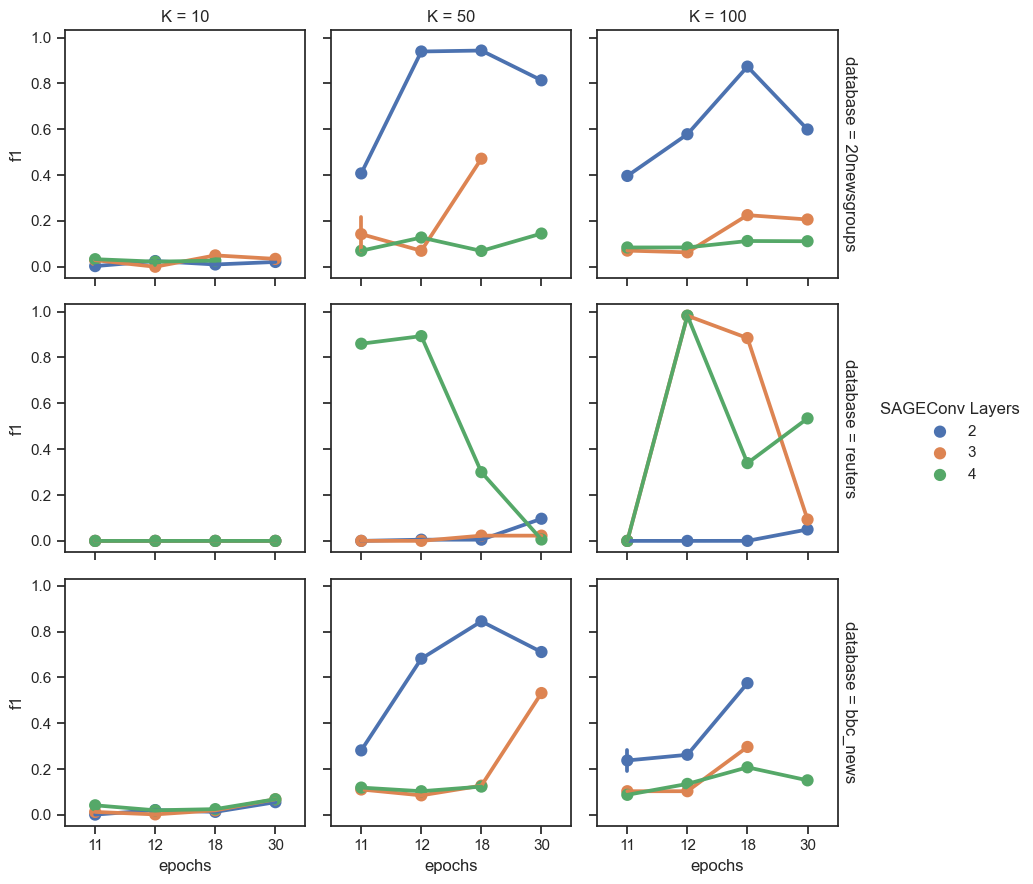

In [7]:
g = sns.FacetGrid(data, col="K", row="database", hue="num_layers", margin_titles=True, despine=False)
g = (g.map(sns.pointplot, "epochs", "f1").add_legend(title="SAGEConv Layers"))
#g.savefig("./plots/experiments_3_datasets.png")

In [8]:
df_all_experiments[(df_all_experiments.K=="100") &
                  # (df_all_experiments.p_dropout==0.2)&
                   (df_all_experiments.database=='20newsgroups') &
                   (df_all_experiments.num_layers==2)
                  ]

AttributeError: 'DataFrame' object has no attribute 'K'

In [3]:
def get_lda_train(database_name, K=100):
    try:
        subset='train'
        database = load_data(database_name=database_name, subset=subset)
        cv = CountVectorizer()
        lda = LDA(n_components=K, max_iter=100, random_state=1, n_jobs=-1)
        rfc = RFC(n_estimators=10000, n_jobs=-1)
        estimators = [("cv", cv), ("lda", lda), ("rfc", rfc)]

        pipe = Pipeline(estimators)
        pipe.fit(database.data, database.target)
        return pipe
    
    except Exception as e:
        logger.info(f'Error fitting lda for {database_name}({subset}): \n {e}')

def get_nmf_train(database_name, K=100):
    try:
        subset='train'
        K=100
        database = load_data(database_name=database_name, subset=subset)
        tfidf = TfidfVectorizer()
        nmf = NMF(n_components=K, max_iter=100, tol=1e-2, random_state=1)
        rfc = RFC(n_estimators=10000, n_jobs=-1)
        estimators = [("tfidf", tfidf), ("nmf", nmf), ("rfc", rfc)]

        pipe = Pipeline(estimators)
        pipe.fit(database.data, database.target)
        return pipe

    except Exception as e:
        logger.info(f'Error fitting nmf for {database_name}({subset}): \n {e}')


In [4]:
database_name="reuters"

pipe_lda = get_lda_train(database_name=database_name, K=100)
micro_lda = test_pipe(pipe_lda, database_name=database_name)
print(f'{database_name} - micro_lda: {micro_lda}')


pipe_nmf = get_nmf_train(database_name=database_name, K=100)
micro_nmf = test_pipe(pipe_nmf, database_name=database_name)
print(f'{database_name} - micro_nmf: {micro_nmf}')

[INFO][2023-03-05 20:57:51 - Mod: functions - Func: load_data - Line: 115]: Loaded data for reuters train. 5 classes: ['acq', 'alum', 'barley', 'bop', 'carcass']. Number of documents: 38845.
[INFO][2023-03-05 21:31:29 - Mod: functions - Func: load_data - Line: 115]: Loaded data for reuters test. 5 classes: ['acq', 'alum', 'barley', 'bop', 'carcass']. Number of documents: 15095.


reuters - micro_lda: 0.20000000000000004


[INFO][2023-03-05 21:32:03 - Mod: functions - Func: load_data - Line: 115]: Loaded data for reuters train. 5 classes: ['acq', 'alum', 'barley', 'bop', 'carcass']. Number of documents: 38845.


KeyboardInterrupt: 

In [ ]:
database_name="bbc_news"

pipe_lda = get_lda_train(database_name=database_name, K=100)
micro_lda = test_pipe(pipe_lda, database_name=database_name)
print(f'{database_name} - micro_lda: {micro_lda}')


pipe_nmf = get_nmf_train(database_name=database_name, K=100)
micro_nmf = test_pipe(pipe_nmf, database_name=database_name)
print(f'{database_name} - micro_nmf: {micro_nmf}')

In [ ]:
len(heterodata_pbg_20ng_k100_test["source"].y)

In [2]:
with open('./pickle_objects/pbg_reuters_k100_train.pickle', 'rb') as f:
    pbg_reuters_k100_train = pickle.load(f)
pbg_reuters_k100_test = load_pbg_test(database_name='reuters', pbg_model_trained=pbg_reuters_k100_train, K=100, disable_tqdm=True)


[INFO][2023-02-26 23:22:21 - Mod: functions - Func: load_data - Line: 115]: Loaded data for reuters train. 5 classes: ['acq', 'alum', 'barley', 'bop', 'carcass']. Number of documents: 38845.
[INFO][2023-02-26 23:22:23 - Mod: functions - Func: load_data - Line: 115]: Loaded data for reuters test. 5 classes: ['acq', 'alum', 'barley', 'bop', 'carcass']. Number of documents: 15095.
[INFO][2023-02-26 23:22:57 - Mod: functions - Func: load_pbg_test - Line: 163]: Performance on pretrained pbg: F1: 0.20.
[INFO][2023-02-26 23:22:57 - Mod: functions - Func: load_pbg_test - Line: 165]: Performed IT-IDF on data reuters (test).


KeyboardInterrupt: 

In [3]:
with open('./pickle_objects/pbg_20ng_k100_train.pickle', 'rb') as f:
    pbg_20ng_k100_train = pickle.load(f)
pbg_20ng_k100_test = load_pbg_test(database_name='20newsgroups', pbg_model_trained=pbg_20ng_k100_train, K=100, disable_tqdm=True)

[INFO][2023-02-26 23:32:24 - Mod: functions - Func: load_data - Line: 115]: Loaded data for 20newsgroups train. 5 classes: ['alt.atheism', 'comp.graphics', 'misc.forsale', 'sci.space', 'talk.religion.misc']. Number of documents: 2619.
[INFO][2023-02-26 23:32:24 - Mod: functions - Func: load_data - Line: 115]: Loaded data for 20newsgroups test. 5 classes: ['alt.atheism', 'comp.graphics', 'misc.forsale', 'sci.space', 'talk.religion.misc']. Number of documents: 1743.
[INFO][2023-02-26 23:32:28 - Mod: functions - Func: load_pbg_test - Line: 163]: Performance on pretrained pbg: F1: 0.17.
[INFO][2023-02-26 23:32:28 - Mod: functions - Func: load_pbg_test - Line: 165]: Performed IT-IDF on data 20newsgroups (test).


KeyboardInterrupt: 

In [ ]:
with open('./pickle_objects/pbg_bbc_news_k100_train.pickle', 'rb') as f:
    pbg_bbc_news_k100_train = pickle.load(f)
pbg_bbc_news_k100_test = load_pbg_test(database_name='bbc_news', pbg_model_trained=pbg_reuters_k100_train, K=100, disable_tqdm=True)

In [ ]:
heterodata_pbg_20ng_k100_test["source"].pred = out.argmax(1)

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
from torch_geometric.nn import to_hetero
from torch_geometric.utils import to_networkx

g = to_networkx(heterodata_pbg_20ng_k100_test.to_homogeneous())
# Networkx seems to create extra nodes from our heterogeneous graph, so I remove them
isolated_nodes = [node for node in g.nodes() if g.out_degree(node) == 0]
[g.remove_node(i_n) for i_n in isolated_nodes]
# Plot the graph
nx.draw(g, with_labels=False, node_size=10, node_color=pred)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# create number for each group to allow use of colormap
from itertools import count
# get unique groups
groups = set(nx.get_node_attributes(g,'group').values())
mapping = dict(zip(sorted(groups),count()))
nodes = g.nodes()
colors = [mapping[g.nodes[n]['group']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()


pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color=g.pred)

In [ ]:
pos = nx.circular_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color=g.pred)

In [ ]:
G = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)

nx.draw(G, pos)

In [ ]:
nx.bipartite.sets(g)[0]

In [ ]:
with open('./pickle_objects/df_all_experiments.pickle', 'rb') as f:
    df_all_experiments = pickle.load(f)


In [ ]:
with open('./pickle_objects/df_experiment_20ng_k10.pickle', 'rb') as f:
    df_experiment_20ng_k10 = pickle.load(f)
with open('./pickle_objects/df_experiment_20ng_k50.pickle', 'rb') as f:
    df_experiment_20ng_k50 = pickle.load(f)
with open('./pickle_objects/df_experiment_20ng_k100.pickle', 'rb') as f:
    df_experiment_20ng_k100 = pickle.load(f)
with open('./pickle_objects/df_experiment_reuters_k10.pickle', 'rb') as f:
    df_experiment_reuters_k10 = pickle.load(f)
with open('./pickle_objects/df_experiment_reuters_k50.pickle', 'rb') as f:
    df_experiment_reuters_k50 = pickle.load(f)
with open('./pickle_objects/df_experiment_reuters_k100.pickle', 'rb') as f:
    df_experiment_reuters_k100 = pickle.load(f)
with open('./pickle_objects/df_experiment_bbc_news_k10.pickle', 'rb') as f:
    df_experiment_bbc_news_k10 = pickle.load(f)
with open('./pickle_objects/df_experiment_bbc_news_k50.pickle', 'rb') as f:
    df_experiment_bbc_news_k50 = pickle.load(f)
with open('./pickle_objects/df_experiment_bbc_news_k100.pickle', 'rb') as f:
    df_experiment_bbc_news_k100 = pickle.load(f)





In [ ]:
df = df_experiment_20ng_k10


In [ ]:
df = df.append(df_experiment_bbc_news_k100,ignore_index=True) 

In [ ]:
df_all_experiments = df_experiment_20ng_k10
df_all_experiments = df_all_experiments.append(df_experiment_20ng_k50,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_20ng_k100,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_reuters_k10,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_reuters_k50,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_reuters_k100,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_bbc_news_k10,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_bbc_news_k50,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_bbc_news_k100,ignore_index=True)

df_all_experiments = df_all_experiments.rename(columns={"database_name": "database_name_aux"})
df_all_experiments["K"] = df_all_experiments["database_name_aux"].str.replace(".*K=", "").str.replace(" ", "")
df_all_experiments["database_name"] = df_all_experiments["database_name_aux"].str.replace("K=.*", "").str.replace(" ", "")

df_all_experiments.drop(["database_name_aux"], axis=1)

with open("./pickle_objects/df_all_experiments.pickle", "wb") as f:
    pickle.dump(df_all_experiments, f, pickle.HIGHEST_PROTOCOL)

In [1]:
Using Bipartite Heterogeneous Networks to Speed Up Inductive
Semi-Supervised Learning and Improve Automatic Text
Categorization

SyntaxError: invalid syntax (1888790296.py, line 1)

In [ ]:
df_all_experiments

In [ ]:
df_all_experiments["database_name_aux"].str.replace("K=.*", "").str.replace(" ", "")